<a href="https://colab.research.google.com/github/somkiatth/git/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Preprocessing

In [ ]:
!pip install nltk==3.8.1 gensim beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


In [ ]:
# Import libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Example text
text_data = [
    "Hello world! Check out this amazing blog: https://example.com/blog.",
    "Data Science is incredible; it combines statistics, coding, and business insights.",
    "NLP stands for Natural Language Processing. Visit https://nlp-example.com for more info."
]

print("Original Text:")
print(text_data)

Original Text:
['Hello world! Check out this amazing blog: https://example.com/blog.', 'Data Science is incredible; it combines statistics, coding, and business insights.', 'NLP stands for Natural Language Processing. Visit https://nlp-example.com for more info.']


## Basic Text Processing

In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
  # 1. Lowercasing
  text = text.lower()
  # 2. Punctuation Removal
  text = text.translate(str.maketrans("", "", string.punctuation))
  # 3. Stopword Removal
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text)
  text = " ".join([word for word in tokens if word not in stop_words])
  # 4. URL Removal
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
  return text

In [ ]:
# Apply preprocessing
preprocessed_texts = [preprocess_text(text) for text in text_data]
print("Preprocessed Texts:")
print(preprocessed_texts)

Preprocessed Texts:
['hello world check amazing blog ', 'data science incredible combines statistics coding business insights', 'nlp stands natural language processing visit  info']


## Lemmatization

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
# 5. lemmatization

lemmatizer = WordNetLemmatizer()
# Apply lemmatization to each word in each text
lemmatized_texts = [" ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) for text in preprocessed_texts]
print("\nLemmatized Texts:")
print(lemmatized_texts)


Lemmatized Texts:
['hello world check amazing blog', 'data science incredible combine statistic coding business insight', 'nlp stand natural language processing visit info']


## Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
tokenized_texts = [word_tokenize(text) for text in lemmatized_texts]
print("\nTokenized Texts:")
print(tokenized_texts)


Tokenized Texts:
[['hello', 'world', 'check', 'amazing', 'blog'], ['data', 'science', 'incredible', 'combine', 'statistic', 'coding', 'business', 'insight'], ['nlp', 'stand', 'natural', 'language', 'processing', 'visit', 'info']]


# Text Representation

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# 7. Bag of Words Representation
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(preprocessed_texts)
print("\nBag of Words Representation:")
print(bow_matrix.toarray())
print("Feature Names:", vectorizer_bow.get_feature_names_out())


Bag of Words Representation:
[[1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0]]
Feature Names: ['amazing' 'blog' 'business' 'check' 'coding' 'combines' 'data' 'hello'
 'incredible' 'info' 'insights' 'language' 'natural' 'nlp' 'processing'
 'science' 'stands' 'statistics' 'visit' 'world']


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 8. TF-IDF Representation
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(preprocessed_texts)
print("\nTF-IDF Representation:")
print(tfidf_matrix.toarray())
print("Feature Names:", vectorizer_tfidf.get_feature_names_out())


TF-IDF Representation:
[[0.4472136  0.4472136  0.         0.4472136  0.         0.
  0.         0.4472136  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4472136 ]
 [0.         0.         0.35355339 0.         0.35355339 0.35355339
  0.35355339 0.         0.35355339 0.         0.35355339 0.
  0.         0.         0.         0.35355339 0.         0.35355339
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.37796447 0.         0.37796447
  0.37796447 0.37796447 0.37796447 0.         0.37796447 0.
  0.37796447 0.        ]]
Feature Names: ['amazing' 'blog' 'business' 'check' 'coding' 'combines' 'data' 'hello'
 'incredible' 'info' 'insights' 'language' 'natural' 'nlp' 'processing'
 'science' 'stands' 'statistics' 'visit' 'world']


## Word2Vec

In [ ]:
# 9. Word2Vec Representation

# Train a Word2Vec model using Gensim
model_word2vec = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
# vector_size=100 specifies the dimensionality of the word vectors e.g each word vector will have 100 dimensions
# window=5 defines the maximum distance between the current and predicted word within a sentence.
# For example, with window=5, the model considers five words to the left and five words to the right of the target word as context
# min_count=1 means that the model includes all words, even those that appear only once

print("\nWord2Vec Word Embeddings:")
for word in ["data", "nlp", "blog"]:
  if word in model_word2vec.wv:
    print(f"Vector for '{word}': {model_word2vec.wv[word]}")


Word2Vec Word Embeddings:
Vector for 'data': [ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977

# Wisesight Sentiment Analysis

This notebook details the steps taken to create a sentiment analyzer using data from Wisesight Sentiment Corpus. Evaluation metric is overall accuracy across `neg`ative, `pos`itive, `neu`tral and `q`uestion classes.


In [ ]:
# #uncomment if you are running from google colab
!pip install sklearn_crfsuite
!pip install emoji
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
!unzip master.zip
!mkdir wisesight_data; ls
!cd wisesight-sentiment-master/kaggle-competition; ls

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.3 MB/s eta 0:00:00
     / 24.8 MB 3.4 MB/s 0:00:05
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pythainlp: filename=pythainlp-5.0.5.dev0-py3-none-any.whl size=19250623 sha256=dccb3adce4c7554320b8a8d2318a4df41e6cf0e90ba83a84b4a94914ea9381c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-i577h99r/wheels/a7/ac/60/a63e7d308d056a8c4636eb9e5ae4b7f5e4d80ce36a36efd1f9
Successfully built pythainlp
--2024-11-18 08:58:01--  https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PyThaiNLP/wisesight-sentiment/zip/refs/heads/master [fol

In [ ]:
# Install Thai font in Matplotlib for Colab
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rcParams

# Step 1: Download the Thai font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # Ensuring matplotlib recognizes the font
mpl.rc('font', family='TH Sarabun New') # Setting the default font to TH Sarabun Newy

--2024-11-18 08:58:34--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-11-18 08:58:35--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-11-18 08:58:35 (4.00 MB/s) - ‘t

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

Corpus: wiki_lm_lstm
- Downloading: wiki_lm_lstm 0.32


  0%|          | 0/1050919089 [00:00<?, ?it/s]

Corpus: wiki_itos_lstm
- Downloading: wiki_itos_lstm 0.32


  0%|          | 0/1530484 [00:00<?, ?it/s]

## Text Processor for Logistic Regression

`pythainlp.ulmfit.process_thai` contains text cleaning rules with the default aimed for sparse models like bag of words. It contains `pre_rules` applied before tokenization and `post_rules` applied after.

* xxrep is used to indicate a repetition of characters

* xxwrep is used to represent the repetition of entire words

* xxurl is a special token to represent URLs in the text

In [ ]:
?process_thai

In [ ]:
from pythainlp.ulmfit import *
process_thai("บ้านนนนน ()อยู่นานนานนาน 😂🤣😃😄😅 PyThaiNLP amp;     www.google.com")

['บ้าน',
 'xxrep',
 'อยู่',
 'xxwrep',
 'นาน',
 '😂',
 '🤣',
 '😃',
 '😄',
 '😅',
 'pythainlp',
 '&',
 'xxurl']

## Process Text Files to CSVs

In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/train.txt") as f:
  texts = [line.strip() for line in f.readlines()]

with open("wisesight-sentiment-master/kaggle-competition/train_label.txt") as f:
  categories = [line.strip() for line in f.readlines()]

all_df = pd.DataFrame({"category":categories, "texts":texts})
all_df.to_csv('all_df.csv',index=False)
all_df.shape

(24063, 2)

In [ ]:
all_df.head()

,category,texts
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1,neu,คะ
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค
3,neu,😅😅😅
4,neu,สวัสดีวันพุธ แนน อะไรนะ


In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/test.txt") as f:
  texts = [line.strip() for line in f.readlines()]

test_df = pd.DataFrame({"category":"test", "texts":texts})
test_df.shape

(2674, 2)

In [ ]:
test_df.head()

,category,texts
0,test,ซื้อแต่ผ้าอนามัยแบบเย็นมาค่ะ แบบว่าอีห่ากูนอนไ...
1,test,ครับ #phithanbkk
2,test,การด่าไปเหมือนได้บรรเทาความเครียดเฉยๆ แต่บีทีเ...
3,test,Cf clarins 5 ขวด 2850
4,test,ทานได้ค่ะ น้ำซุป MK ต้มมาจากหัวผักกาด ซีอิ้วขา...


## Load Data

In [ ]:
all_df["processed"] = all_df.texts.map(lambda x: "|".join(process_thai(x)))
all_df["wc"] = all_df.processed.map(lambda x: len(x.split("|")))
all_df["uwc"] = all_df.processed.map(lambda x: len(set(x.split("|"))))

test_df["processed"] = test_df.texts.map(lambda x: "|".join(process_thai(x)))
test_df["wc"] = test_df.processed.map(lambda x: len(x.split("|")))
test_df["uwc"] = test_df.processed.map(lambda x: len(set(x.split("|"))))

In [ ]:
all_df.head()

,category,texts,processed,wc,uwc
0,neu,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,ประเทศ|เรา|ผลิต|และ|ส่งออก|ยาสูบ|เยอะ|สุด|ใน|โ...,13,13
1,neu,คะ,คะ,1,1
2,neg,อิเหี้ยออมทำกูอยากกินเอ็มเค,อิ|เหี้ย|ออมทำ|กู|อยาก|กิน|เอ็ม|เค,8,8
3,neu,😅😅😅,xxwrep|😅,2,2
4,neu,สวัสดีวันพุธ แนน อะไรนะ,สวัสดี|วัน|พุธ|แนน|อะไร|นะ,6,6


In [ ]:
#prevalence
all_df.category.value_counts() / all_df.shape[0]

,count
category,
neu,0.544612
neg,0.255164
pos,0.178698
q,0.021527


## Train-validation Split

We perform 85/15 random train-validation split. We also perform under/oversampling to balance out the classes a little.

In [ ]:
#when finding hyperparameters
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

#when actually doing it
# train_df = all_df.copy()
# valid_df = pd.read_csv('valid_df.csv')

In [ ]:
valid_df.head()

,category,texts,processed,wc,uwc
0,neu,เซตเมนู 343 บาทเหรอคะ👍🏻🤪,เซต|เมนู|343|บาท|เหรอ|คะ|👍🏻🤪,7,7
1,neg,ลดแค่แป๊ปซี่ กินเกือบพัน,ลด|แค่|แป|๊ป|ซี่|กิน|เกือบ|พัน,8,8
2,neg,ไปกินมาไม่เห็นเหมือนในรูปเลย,ไป|กิน|มา|ไม่เห็น|เหมือน|ใน|รูป|เลย,8,8
3,q,มีน้ำหอม Dior addict มั้ยค่ะ,มีน้ำหอม|dior|addict|มั้ย|ค่ะ,5,5
4,neu,ชม ชมพู่,ชม|ชมพู่,2,2


In [ ]:
#prevalence
print(train_df["category"].value_counts() / train_df.shape[0])

category
neu    0.545055
neg    0.254535
pos    0.178653
q      0.021757
Name: count, dtype: float64


In [ ]:
#prevalence
print(valid_df["category"].value_counts() / valid_df.shape[0])

category
neu    0.542105
neg    0.258726
pos    0.178947
q      0.020222
Name: count, dtype: float64


## Logistic Regression

### Create Features

In [ ]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["category"]

In [ ]:
all_df["texts"].head()

,texts
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ
1,คะ
2,อิเหี้ยออมทำกูอยากกินเอ็มเค
3,😅😅😅
4,สวัสดีวันพุธ แนน อะไรนะ


In [ ]:
#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)

# ngram_range=(1, 2) includes both unigrams and bigrams in the feature extraction process
# min_df=20 filters out words or n-grams that appear in fewer than 20 documents
# sublinear_tf=True applies a sublinear transformation to the term frequency using 1 + log(tf)

tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["texts"])
text_test = tfidf_fit.transform(test_df["texts"])
text_train.shape, text_valid.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((20453, 4288), (3610, 4288))

In [ ]:
text_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# -*- coding: utf-8 -*-
"""
Visualization of text data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Collection, Callable, Tuple

__all__ = ['top_feats_label', 'top_feats_all', 'plot_top_feats']

def top_feats_label(X: np.ndarray, features: Collection[str], label_idx: Collection[bool] = None,
                    min_val: float = 0.1, agg_func: Callable = np.mean)->pd.DataFrame:
    '''
    original code (Thomas Buhrman)[from https://buhrmann.github.io/tfidf-analysis.html]
    rank features of each label by their encoded values (CountVectorizer, TfidfVectorizer, etc.)
    aggregated with `agg_func`
    :param X np.ndarray: document-value matrix
    :param features Collection[str]: feature names
    :param label_idx Collection[int]: position of rows with specified label
    :param min_val float: minimum value to take into account for each feature
    :param agg_func Callable: how to aggregate features such as `np.mean` or `np.sum`
    :return: a dataframe with `feature`, `score` and `ngram`
    '''
    res = X[label_idx] if label_idx is not None else X
    res[res < min_val] = 0
    res_agg = agg_func(res, axis=0)
    df = pd.DataFrame([(features[i], res_agg[i]) for i in np.argsort(res_agg)[::-1]])
    df.columns = ['feature','score']
    df['ngram'] = df.feature.map(lambda x: len(set(x.split(' '))))
    return df

def top_feats_all(X: np.ndarray, y: np.ndarray, features: Collection[str], min_val: float = 0.1,
                  agg_func: Callable = np.mean)->Collection[pd.DataFrame]:
    '''
    original code (Thomas Buhrman)[from https://buhrmann.github.io/tfidf-analysis.html]
    for all labels, rank features of each label by their encoded values (CountVectorizer, TfidfVectorizer, etc.)
    aggregated with `agg_func`
    :param X np.ndarray: document-value matrix
    :param y np.ndarray: labels
    :param features Collection[str]: feature names
    :param min_val float: minimum value to take into account for each feature
    :param agg_func Callable: how to aggregate features such as `np.mean` or `np.sum`
    :return: a list of dataframes with `rank` (rank within label), `feature`, `score`, `ngram` and `label`
    '''
    labels = np.unique(y)
    dfs = []
    for l in labels:
        label_idx = (y==l)
        df = top_feats_label(X,features,label_idx,min_val,agg_func).reset_index()
        df['label'] = l
        df.columns = ['rank','feature','score','ngram','label']
        dfs.append(df)
    return dfs

def plot_top_feats(dfs: Collection[pd.DataFrame], top_n: int = 25, ngram_range: Tuple[int,int]=(1,2),)-> None:
    '''
    original code (Thomas Buhrman)[from https://buhrmann.github.io/tfidf-analysis.html]
    plot top features from a collection of `top_feats_all` dataframes
    :param dfs Collection[pd.DataFrame]: `top_feats_all` dataframes
    :param top_n int: number of top features to show
    :param ngram_range Tuple[int,int]: range of ngrams for features to show
    :return: nothing
    '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(top_n)
    for i, df in enumerate(dfs):
        df = df[(df.ngram>=ngram_range[0])&(df.ngram<=ngram_range[1])][:top_n]
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("score", labelpad=16, fontsize=14)
        ax.set_title(f"label = {str(df.label[0])}", fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        ax.invert_yaxis()
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [ ]:
#visualize texts
features = tfidf_fit.get_feature_names_out()
%time ts = top_feats_all(text_train.toarray(), y_train, features)
print(ts[0].shape)
ts[0].head()

CPU times: user 637 ms, sys: 1.12 s, total: 1.76 s
Wall time: 1.74 s
(4288, 5)


,rank,feature,score,ngram,label
0,0,ไม่,0.032395,1,neg
1,1,xxrep,0.023281,1,neg
2,2,กิน,0.022258,1,neg
3,3,เลย,0.022014,1,neg
4,4,แต่,0.020045,1,neg


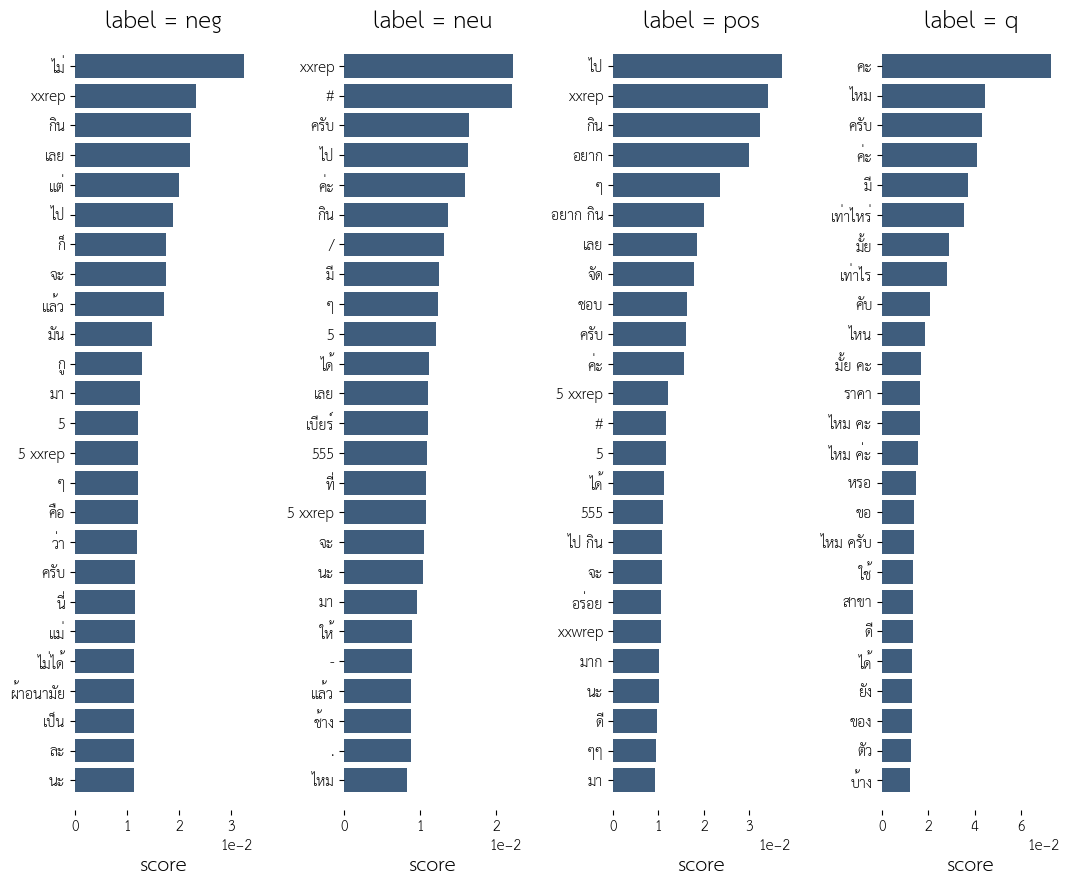

In [ ]:
plot_top_feats(ts)

In [ ]:
#word count and unique word counts; actually might not be so useful
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(all_df[["wc","uwc"]].astype(float))
print(scaler_fit.mean_, scaler_fit.var_)
num_train = scaler_fit.transform(train_df[["wc","uwc"]].astype(float))
num_valid = scaler_fit.transform(valid_df[["wc","uwc"]].astype(float))
num_test = scaler_fit.transform(test_df[["wc","uwc"]].astype(float))
num_train.shape, num_valid.shape

[21.01146989 17.66857832] [1050.97015477  493.28279566]


((20453, 2), (3610, 2))

In [ ]:
num_train

array([[ 0.03049262,  0.14999667],
       [ 0.24641758,  0.24004632],
       [-0.21627877, -0.16517709],
       ...,
       [ 3.05344206,  3.121635  ],
       [-0.37051088, -0.43532603],
       [-0.55558942, -0.66045014]])

In [ ]:
#concatenate text and word count features
X_train = np.concatenate([num_train,text_train.toarray()],axis=1)
X_valid = np.concatenate([num_valid,text_valid.toarray()],axis=1)
X_test = np.concatenate([num_test,text_test.toarray()],axis=1)
X_train.shape, X_valid.shape

((20453, 4290), (3610, 4290))

In [ ]:
X_train

array([[ 0.03049262,  0.14999667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24641758,  0.24004632,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.21627877, -0.16517709,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.05344206,  3.121635  ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.37051088, -0.43532603,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.55558942, -0.66045014,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Fit Model

In [ ]:
#fit logistic regression models
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', random_state=42))
model.fit(X_train, y_train)
model.score(X_valid,y_valid)

0.7074792243767313

### See Results

In [ ]:
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df["preds"] = model.predict(X_valid)
probs_df["category"] = valid_df.category
probs_df["texts"] = valid_df.texts
probs_df["processed"] = valid_df.processed
probs_df["wc"] = valid_df.wc
probs_df["uwc"] = valid_df.uwc
probs_df["hit"] = (probs_df.preds==probs_df.category)
probs_df.to_csv("probs_df_linear.csv", index=False)

In [ ]:
probs_df.head()

,neg,neu,pos,q,preds,category,texts,processed,wc,uwc,hit
0,0.030373,0.725010,0.097065,0.147552,neu,neu,เซตเมนู 343 บาทเหรอคะ👍🏻🤪,เซต|เมนู|343|บาท|เหรอ|คะ|👍🏻🤪,7,7,True
1,0.400637,0.538361,0.053941,0.007061,neu,neg,ลดแค่แป๊ปซี่ กินเกือบพัน,ลด|แค่|แป|๊ป|ซี่|กิน|เกือบ|พัน,8,8,False
2,0.641464,0.224660,0.131419,0.002457,neg,neg,ไปกินมาไม่เห็นเหมือนในรูปเลย,ไป|กิน|มา|ไม่เห็น|เหมือน|ใน|รูป|เลย,8,8,True
3,0.045546,0.710600,0.102279,0.141574,neu,q,มีน้ำหอม Dior addict มั้ยค่ะ,มีน้ำหอม|dior|addict|มั้ย|ค่ะ,5,5,False
4,0.040024,0.776757,0.164732,0.018486,neu,neu,ชม ชมพู่,ชม|ชมพู่,2,2,True


0.7074792243767313


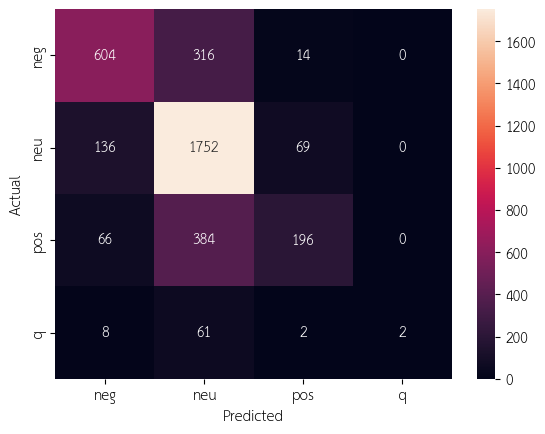

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_df.category,probs_df.preds)
print(model.score(X_valid,y_valid))
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# IMDB Movie Reviews Sentiment Analysis Using LSTM - PyTorch

In [1]:
!git clone https://github.com/pornpra/sentiment_analysis.git

Cloning into 'sentiment_analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
import zipfile

# Replace 'imdb_dataset.zip' with the name of your uploaded file if different
with zipfile.ZipFile('/content/sentiment_analysis/imdb_dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/sentiment_analysis/')

In [ ]:
df = pd.read_csv('/content/sentiment_analysis/IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Data Processing — Convert to lower case, Remove punctuation etc

In [ ]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [ ]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [ ]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))

In [ ]:
df['clean_text'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [ ]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))

In [ ]:
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


In [ ]:
all_text2 = df['clean_text'].tolist()

### Tokenize — Create Vocab to Int mapping dictionary

In [ ]:
from collections import Counter
all_text2 = ' '.join(all_text2)
# create a list of words
words = all_text2.split()

In [ ]:
words

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'mebr',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordbr',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 

In [ ]:
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [ ]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [ ]:
vocab_to_int

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'br': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'who': 36,
 'so': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'if': 43,
 'has': 44,
 'out': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'my': 53,
 'even': 54,
 'no': 55,
 'up': 56,
 'would': 57,
 'she': 58,
 'time': 59,
 'only': 60,
 'which': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'than': 70,
 'we': 71,
 'much': 72,
 'well': 73,
 'been': 74,
 'get': 75,
 'will': 76,
 'other': 77,
 'do': 78,
 'great': 79,
 'also': 80,
 'into': 81,
 'bad': 82,
 'be

In [ ]:
reviews_split = df['clean_text'].tolist()

In [ ]:
reviews_int = []
for review in reviews_split:
  r = [vocab_to_int[w] for w in review.split()]
  reviews_int.append(r)
print(reviews_int[0:3])

[[28, 4, 1, 77, 1941, 44, 1063, 11, 100, 145, 40, 479, 3324, 393, 461, 26, 3190, 34, 23, 205, 14, 10, 6, 601, 48, 590, 15, 2137, 12, 1, 87, 146, 11, 3255, 69, 42, 3324, 13, 29, 5600, 2, 15378, 134, 4, 582, 61, 282, 7, 205, 35, 1, 670, 138, 1707, 69, 10, 6, 21, 3, 118, 16, 1, 8330, 5794, 39, 11861, 10, 118, 2508, 55, 6064, 15, 5636, 5, 1470, 381, 39, 582, 29, 6, 3407, 7, 1, 352, 340, 4, 1, 23503, 12, 8, 6, 469, 3324, 14, 11, 6, 1, 11516, 338, 5, 1, 16023, 6870, 2543, 1061, 61649, 8, 2637, 1375, 20, 25365, 536, 33, 4727, 2520, 4, 1, 1208, 112, 31, 1, 7153, 25, 2992, 13015, 2, 408, 61650, 37, 17529, 6, 21, 319, 20, 1, 5098, 3720, 536, 6, 344, 5, 81744, 8470, 41120, 15379, 5171, 7893, 2461, 2, 18404, 61651, 329, 9265, 7472, 13445, 2, 8721, 34936, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 668, 5, 1, 187, 11, 8, 262, 112, 77, 257, 548, 3001, 819, 178, 1271, 4349, 16, 2499, 1096, 819, 1412, 819, 81745, 148, 978, 181, 1, 87, 393, 9, 120, 201, 3255, 69, 14, 37, 1574, 8, 13

In [ ]:
labels_split = df['sentiment'].tolist()

In [ ]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

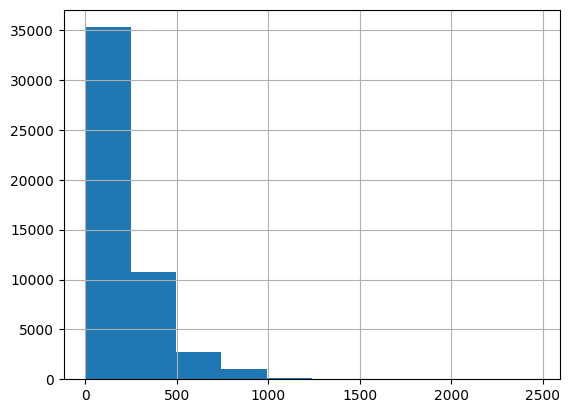

,0
count,50000.000000
mean,230.258240
std,170.663887
min,4.000000
25%,126.000000
50%,172.000000
75%,280.000000
max,2469.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [ ]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

### Padding / Truncating the remaining data

To deal with both short and long reviews, we will pad or truncate all our reviews to a specific length. We define this length by Sequence Length. This sequence length is same as number of time steps for LSTM layer.

For reviews shorter than seq_length, we will pad with 0s. For reviews longer than seq_length we will truncate them to the first seq_length words.

In [ ]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)

    for i, review in enumerate(reviews_int):
        review_len = len(review)

        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]

        features[i,:] = np.array(new)

    return features

In [ ]:
features = pad_features(reviews_int,200)

In [ ]:
print (features[:10,:])

[[   28     4     1 ...   978   181     1]
 [    0     0     0 ...  1900    73   223]
 [    0     0     0 ...    64    15   333]
 ...
 [    0     0     0 ...    20     1   946]
 [    0     0     0 ... 10151 45601    60]
 [    0     0     0 ...    12    79  1215]]


### Training, Validation, Test Dataset Split

Once we have got our data in nice shape, we will split it into training, validation and test sets


In [ ]:
len_feat = len(features)

In [ ]:
split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
type(test_y)

list

In [ ]:
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)

### Dataloaders and Batching

After creating our training, test and validation data. Next step is to create dataloaders for this data. We can use generator function for batching our data into batches instead we will use a TensorDataset. This is one of a very useful utility in PyTorch for using our data with DataLoaders with exact same ease as of torchvision datasets

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,  7027,  3522,    35],
        [    0,     0,     0,  ..., 18934,    12,  2838],
        [   73,     8,     6,  ...,     3,    17,    32],
        ...,
        [   14,     9,   226,  ...,    25,  2602,     3],
        [    0,     0,     0,  ...,    82,     8,     6],
        [    0,     0,     0,  ...,   700,    10,    28]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1])


### Define the LSTM Network Architecture

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding. It is the size of the input space for the embedding layer (nn.Embedding)
output_size = 1
embedding_dim = 400 # This is the input size for the LSTM layer, as the LSTM processes sequences of these embeddings.
hidden_dim = 256
n_layers = 2
model = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(model)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
# First checking if GPU is available
train_on_gpu = torch.cuda.is_available()

if(train_on_gpu):
  print('Training on GPU.')
else:
  print('No GPU available, training on CPU.')

Training on GPU.


### Training Loop

In [ ]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
  pred = torch.round(pred.squeeze())
  return torch.sum(pred == label.squeeze()).item()

In [ ]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
  model.cuda()

model.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            model.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Traning Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Traning Loss: 0.659934... Val Loss: 0.662686
Epoch: 1/4... Step: 200... Traning Loss: 0.470765... Val Loss: 0.576009
Epoch: 1/4... Step: 300... Traning Loss: 0.575235... Val Loss: 0.598783
Epoch: 1/4... Step: 400... Traning Loss: 0.705178... Val Loss: 0.680237
Epoch: 1/4... Step: 500... Traning Loss: 0.658058... Val Loss: 0.639565
Epoch: 1/4... Step: 600... Traning Loss: 0.469037... Val Loss: 0.551185
Epoch: 1/4... Step: 700... Traning Loss: 0.501732... Val Loss: 0.558323
Epoch: 1/4... Step: 800... Traning Loss: 0.373899... Val Loss: 0.505847
Epoch: 2/4... Step: 900... Traning Loss: 0.425755... Val Loss: 0.476606
Epoch: 2/4... Step: 1000... Traning Loss: 0.455190... Val Loss: 0.467526
Epoch: 2/4... Step: 1100... Traning Loss: 0.319483... Val Loss: 0.450715
Epoch: 2/4... Step: 1200... Traning Loss: 0.398300... Val Loss: 0.436594
Epoch: 2/4... Step: 1300... Traning Loss: 0.380790... Val Loss: 0.398713
Epoch: 2/4... Step: 1400... Traning Loss: 0.248594... Val Lo

## Testing

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = model.init_hidden(batch_size)

model.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output, h = model(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.386
Test accuracy: 0.860


## Inference

In [ ]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [ ]:
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = []
    #list of reviews
    #though it contains only one review as of now
    reviews_int = []
    for word in word_list:
        if word in vocab_to_int.keys():
            num_list.append(vocab_to_int[word])
    reviews_int.append(num_list)
    return reviews_int

In [ ]:
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be
        positive or negative in sentiment, using a trained model.

        params:
        net - A trained net
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, vocab_to_int)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=seq_length)

    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)

    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)

    #rounding the output to nearest 0 or 1
    pred = torch.round(output)

    #mapping the numeric values to postive or negative
    output = ["Positive" if pred.item() == 1 else "Negative"]

    # print custom response based on whether test_review is pos/neg
    print(output)

In [ ]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'

In [ ]:
# call function
# try negative and positive reviews!
seq_length=200
predict(model, test_review_pos, seq_length)

['Positive']


# Sentiment Analysis by Hugging Face

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
print(sentiment_pipeline("I love this product!"))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998855590820312}]


In [ ]:
print(sentiment_pipeline("I appreciate the fast delivery, but I'm disappointed by the poor quality of the product."))

[{'label': 'NEGATIVE', 'score': 0.9995670914649963}]
